# Libraries Used 

In [1]:
from csv import reader
import pandas as pd
from math import sqrt
import pandas as pd
import random
from random import randrange
import time
from random import seed
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds

## Loading the Movies file

In [3]:
movies_file = 'C:/Users/sreekupc/Downloads/ml-20m/movies.csv'
df_movies = pd.read_csv(movies_file, usecols=['movieId','title'])

## Movies DataFrame

In [4]:
df_movies.head(10)

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
5,6,Heat (1995)
6,7,Sabrina (1995)
7,8,Tom and Huck (1995)
8,9,Sudden Death (1995)
9,10,GoldenEye (1995)


## Loading the Ratings file

In [5]:
ratings_file = 'C:/Users/sreekupc/Downloads/ml-20m/ratings.csv'
df_ratings = pd.read_csv(ratings_file, usecols = ['userId', 'movieId','rating'])

## Ratings DataFrame

In [6]:
df_ratings.head(10)

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
5,1,112,3.5
6,1,151,4.0
7,1,223,4.0
8,1,253,4.0
9,1,260,4.0


### No of Users and Movies

In [7]:
print("Shape of Ratings: ", df_ratings.shape)
user_id_col = df_ratings['userId']
print("No of Users: ", user_id_col.nunique())
movie_id_col = df_ratings['movieId']
print("No of Movies: ", movie_id_col.nunique())

Shape of Ratings:  (20000263, 3)
No of Users:  138493
No of Movies:  26744


## Distribution of Ratings

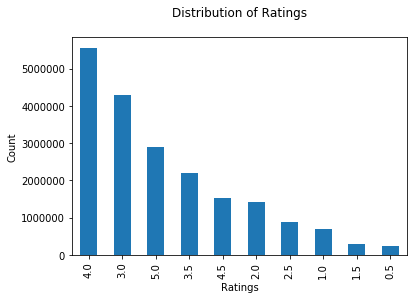

In [8]:
df_ratings.rating.value_counts(sort=True).plot(kind = 'bar')
plt.title('Distribution of Ratings\n')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

## Top 10 movies with highest rating

In [9]:
ratings_count = pd.DataFrame(df_ratings.groupby('movieId')['rating'].count())
ratings_count.sort_values('rating', ascending=False).head(10)

,rating
movieId,
296,67310
356,66172
318,63366
593,63299
480,59715
260,54502
110,53769
589,52244
2571,51334


## Trend of Movie Ids and their Respective ratings

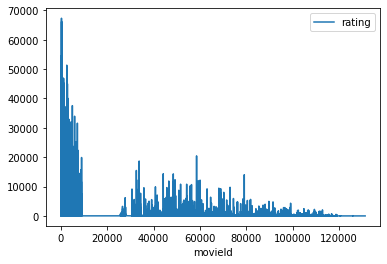

In [10]:
ratings_count.plot(kind = 'line')

In [11]:
users_count = pd.DataFrame(df_ratings.groupby('userId')['rating'].count())
users_count.sort_values('rating', ascending=False).head(10)

,rating
userId,
118205,9254
8405,7515
82418,5646
121535,5520
125794,5491
74142,5447
34576,5356
131904,5330
83090,5169


## Trend of User Ids and their Respective number of ratings

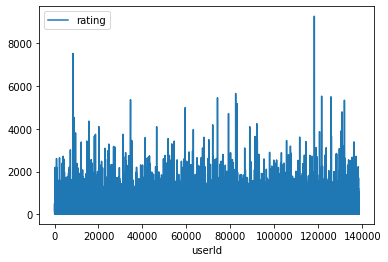

In [12]:
users_count.plot(kind = 'line')

## For statistical significance removing users who rated less than 200 movies and removing movies that got rating less than 100

In [13]:
users_cnt = df_ratings['userId'].value_counts()
users_final = df_ratings[df_ratings['userId'].isin(users_cnt[users_cnt >= 200].index)]
rtng_cnt_per_user = users_final['movieId'].value_counts()
#print(rtng_cnt_per_user)
ratings_final = users_final[users_final['movieId'].isin(rtng_cnt_per_user[rtng_cnt_per_user >= 100].index)]
#print(ratings_final)
ratings_final.head()

,userId,movieId,rating
541,7,3,3.0
542,7,7,3.0
543,7,11,4.0
544,7,15,2.0
545,7,16,3.0


## No of Users and Movies after filtering

In [14]:
movie_id = ratings_final['movieId']
user_id = ratings_final['userId']
print("Shape of our filtered dataset: ", ratings_final.shape)
print("No of Movies that have more than 100 User Ratings: ", movie_id.nunique())
print("No of Users that have given more than 200 movie Ratings: ", user_id.nunique())

Shape of our filtered dataset:  (12177275, 3)
No of Movies that have more than 100 User Ratings:  8117
No of Users that have given more than 200 movie Ratings:  26826


## Converting it into a pivot table 

In [15]:
ratings_2D_mtrx = ratings_final.pivot(index='movieId', columns='userId', values='rating').fillna(0)

print("Shape of Ratings Matrix is: ", ratings_2D_mtrx.shape)
ratings_2D_mtrx.head()

Shape of Ratings Matrix is:  (8117, 26826)


userId,7,11,14,24,31,53,54,58,69,82,...,138456,138457,138459,138464,138467,138472,138474,138477,138483,138493
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,4.5,4.5,4.0,3.0,4.0,4.0,5.0,4.0,5.0,...,1.0,0.0,2.0,4.0,4.0,3.0,5.0,3.0,4.0,3.5
2,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,3.0,0.0,0.0,3.0,0.0,0.0,4.0,0.0,3.0,4.0
3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0


## Making a list of new Movie set

In [16]:
movie_id_list = list()
movie_id_list = np.unique(ratings_final['movieId'].values.tolist())

## Length of new movie list

In [17]:
print(len(movie_id_list))

8117


# Implementing K-Nearest Neighbors Algorithm

### Every time we run this function it selects random movie that needs Recommendation

In [18]:
def randomMovieForRcmd(movies_list):
    movId_for_recmd = np.random.choice(movie_id_list)
    return movId_for_recmd

### Here we calculate cosine similarity 

In [19]:
def calculateDistance(movId_for_recmd, ratings_2D_mtrx):
    test_row = ratings_2D_mtrx.loc[movId_for_recmd].values
    similarity_metric = list()
    for i in range(len(movie_id_list)):
        if movie_id_list[i] != movId_for_recmd:
            train_row = ratings_2D_mtrx.loc[movie_id_list[i]].values
            cosine_similarity = (np.dot(test_row, train_row)) / (np.linalg.norm(test_row) * np.linalg.norm(train_row))
            similarity_metric.append((movie_id_list[i],cosine_similarity))
    similarity_metric.sort(key=lambda tup: tup[1], reverse=True)
    return similarity_metric

### Here we calculate K nearest Neighbors

In [20]:
def calculateNeighbors(similarity_metric, no_neighs):
    neighbors_list = list()
    for i in range(no_neighs):
        neighbors_list.append(similarity_metric[i])
    return neighbors_list
    
    

# Recommendations for specific Movie

In [132]:
tic = time.time()
id_for_recmnd = randomMovieForRcmd(movie_id_list)
list_of_sim_movies = calculateDistance(id_for_recmnd, ratings_2D_mtrx)
sim_neigh_list = calculateNeighbors(list_of_sim_movies, 11)

print("Movie recommendations for :",(df_movies.loc[df_movies['movieId'] == id_for_recmnd].title).to_string(index= False))
print("--------------------------------------------------------------------------------------")
for i in range(len(sim_neigh_list)):
    mvId = sim_neigh_list[i][0] 
    sim_dist = sim_neigh_list[i][1]
    print('{0}: {1}, with distance {2}:'.format(i+1, (df_movies.loc[df_movies['movieId'] == mvId].title).to_string(index= False), sim_dist))
tac = time.time()
print('\n')
print("Time taken for Recommendations:", tac-tic)

Movie recommendations for :  Iron Man (2008)
--------------------------------------------------------------------------------------
1:  Dark Knight, The (2008), with distance 0.8050800288372675:
2:  WALL·E (2008), with distance 0.7169661110541645:
3:  Star Trek (2009), with distance 0.6985666206436132:
4:  Avatar (2009), with distance 0.6743862094786703:
5:  Casino Royale (2006), with distance 0.6733278017096975:
6:  Bourne Ultimatum, The (2007), with distance 0.6705530615373873:
7:  Batman Begins (2005), with distance 0.6696730340956994:
8:  300 (2007), with distance 0.6694109897377641:
9:  Inception (2010), with distance 0.6653227836285693:
10:  V for Vendetta (2006), with distance 0.6520232131183363:
11:  Iron Man 2 (2010), with distance 0.6471338418029592:


Time taken for Recommendations: 15.168890953063965


# Matrix Factorization

In [39]:
ratings_for_mat_fact = ratings_final.pivot(index='userId', columns='movieId', values='rating').fillna(0)

print("Shape of Ratings Matrix is: ", ratings_for_mat_fact.shape)
ratings_for_mat_fact.head()

Shape of Ratings Matrix is:  (26826, 8117)


movieId,1,2,3,4,5,6,7,8,9,10,...,115617,116161,116797,116823,116977,117176,118696,118997,119141,119145
userId,,,,,,,,,,,,,,,,,,,,,
7,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,4.5,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,4.0,0.0,0.0,0.0,2.0,4.0,3.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0


In [40]:
mean_vals = np.mean(ratings_for_mat_fact.values, axis=1)

In [41]:
len(mean_vals.reshape(-1,1))

26826

## Demeaning the pivot table

In [42]:
Ratings_demeaned = ratings_for_mat_fact - mean_vals.reshape(-1,1)

In [43]:
Ratings_demeaned.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,115617,116161,116797,116823,116977,117176,118696,118997,119141,119145
userId,,,,,,,,,,,,,,,,,,,,,
7,-0.111864,-0.111864,2.888136,-0.111864,-0.111864,-0.111864,2.888136,-0.111864,-0.111864,-0.111864,...,-0.111864,-0.111864,-0.111864,-0.111864,-0.111864,-0.111864,-0.111864,-0.111864,-0.111864,-0.111864
11,4.263644,-0.236356,-0.236356,-0.236356,-0.236356,-0.236356,-0.236356,-0.236356,-0.236356,2.263644,...,-0.236356,-0.236356,-0.236356,-0.236356,-0.236356,-0.236356,-0.236356,-0.236356,-0.236356,-0.236356
14,4.387705,-0.112295,-0.112295,-0.112295,-0.112295,-0.112295,3.387705,-0.112295,-0.112295,-0.112295,...,-0.112295,-0.112295,-0.112295,-0.112295,-0.112295,-0.112295,-0.112295,-0.112295,-0.112295,-0.112295
24,3.792781,-0.207219,-0.207219,-0.207219,1.792781,3.792781,2.792781,-0.207219,-0.207219,2.792781,...,-0.207219,-0.207219,-0.207219,-0.207219,-0.207219,-0.207219,-0.207219,-0.207219,-0.207219,-0.207219
31,2.897745,-0.102255,-0.102255,-0.102255,-0.102255,-0.102255,-0.102255,-0.102255,-0.102255,-0.102255,...,-0.102255,-0.102255,-0.102255,-0.102255,-0.102255,-0.102255,4.897745,-0.102255,-0.102255,-0.102255


## Applying Singular Value Decomposition

In [44]:
U, sigma, Vt =  svds(Ratings_demeaned, k=100)

In [45]:
sigma = np.diag(sigma)

In [46]:
ratings_of_user = np.dot(np.dot(U, sigma), Vt) + mean_vals.reshape(-1,1)

## Pivot table after Matrix Factorization using Singular Value Decomposition

In [47]:
decom_matrix_preds = pd.DataFrame(ratings_of_user, columns = ratings_for_mat_fact.columns)
decom_matrix_preds.head(10)

movieId,1,2,3,4,5,6,7,8,9,10,...,115617,116161,116797,116823,116977,117176,118696,118997,119141,119145
0,0.600874,1.061860,0.761178,0.196265,0.419731,-0.393323,1.586667,-0.075404,-0.091929,0.157572,...,0.006431,-0.050852,-0.085146,-0.059769,-0.002068,-0.042548,0.014253,-0.028084,-0.013728,-0.001155
1,5.282396,2.409423,-0.297370,0.001358,-0.003361,-0.030838,-0.007466,0.057638,0.327463,1.567566,...,0.067512,0.031496,0.040543,0.042193,0.043780,0.033781,0.072514,0.037764,0.031892,0.038883
2,5.695332,1.795064,0.481860,-0.047078,0.736014,-0.282934,1.385259,0.152518,-0.110572,0.377069,...,0.112124,-0.003786,-0.027426,0.047027,-0.010769,0.024038,0.028163,0.068303,-0.014536,0.007390
3,3.483912,-0.125692,0.904064,0.064877,0.225698,4.094514,0.606284,-0.138192,0.154876,2.142616,...,0.056303,-0.027917,-0.070390,0.051514,0.007538,-0.061344,0.044971,0.004216,0.007035,-0.025851
4,1.662697,0.164546,0.128250,-0.059100,-0.140419,0.047938,0.164220,-0.111211,-0.010701,-0.586939,...,0.549235,-0.103697,0.205680,0.506271,0.005286,0.039895,0.688040,0.114873,0.157819,0.081266
5,1.445312,0.220890,-0.178974,0.176070,-0.188251,-0.193252,-0.349413,-0.021461,-0.105285,0.036557,...,-0.028170,0.043496,0.053538,-0.010091,0.019929,0.042410,-0.068250,-0.013660,0.013724,0.013817
6,3.737314,1.740828,1.032786,0.144300,0.952584,2.843412,1.559763,-0.023748,0.547501,4.357852,...,0.009078,-0.001431,-0.007605,-0.042976,-0.035218,0.014424,0.015350,-0.030131,-0.010236,0.005079
7,2.078098,2.431664,0.688980,0.337125,0.420818,3.449997,1.047818,0.025850,-0.061503,0.646746,...,-0.031946,0.022268,-0.029682,-0.004001,0.002957,0.015725,0.032249,0.021485,-0.016971,0.017246
8,3.811991,1.961092,1.834302,-0.000658,0.982493,2.689146,1.173682,0.138517,1.175384,3.234434,...,0.039210,-0.006062,0.015152,0.013811,0.010162,0.047876,0.026523,0.016350,-0.002041,0.019010
9,1.710129,0.244234,-0.192037,0.099293,-0.006156,2.216037,0.135977,-0.014725,0.015451,0.175921,...,0.051349,0.141854,0.202624,-0.030173,0.017567,0.156767,-0.018559,0.015401,0.019220,0.028969


In [31]:
df_movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [32]:
movies_file_genre = 'C:/Users/sreekupc/Downloads/ml-20m/.csv'
df_movies_genre = pd.read_csv(movies_file, usecols=['movieId','title', 'genres'])

In [33]:
df_movies_genre.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Merging UserId table on Movies data frame

In [34]:
all_users_rtngs = df_movies_genre.merge(df_ratings, on = 'movieId')

In [35]:
all_users_rtngs.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5


## Creating dicitonary for userId to access respective data rows from Matrix Factorization DataFrame

In [119]:
unique_user_list = ratings_final['userId'].drop_duplicates().values.tolist()

userId_dict = {unique_user_list[i]: i for i in range(len(unique_user_list))}

# This Method Recommends movies based on the userID given

In [121]:
def recommendByMatrixFact(userid,decom_matrix_preds, all_users_rtngs,df_movies_genre, num_of_recommd ):
    spec_user_info = all_users_rtngs[all_users_rtngs['userId'] == userid]
    user_top_ratings = spec_user_info.sort_values(by=['rating'], ascending =False).head(10) 
    movie_dict = dict.fromkeys(spec_user_info['movieId'].values.tolist(),0)
    demean_val_spec_user = decom_matrix_preds.iloc[userId_dict[userid]].sort_values(ascending = False).to_frame().reset_index()
    demean_val_spec_user.columns = ['movieId','demean_val']
    count = 0.0
    mat_fact_mov_list = list()
    for i in demean_val_spec_user['movieId'].values.tolist():
        if i not in movie_dict:
            mat_fact_mov_list.append(i)
            count += 1
            if count == num_of_recommd:
                break
    final_recommend_list= list()
    for i in mat_fact_mov_list:
        final_recommend_list.append(df_movies_genre[df_movies_genre['movieId'] == i].values.tolist())    
    flat_list = [item for sublist in final_recommend_list for item in sublist]
    df_final_recommend = pd.DataFrame(flat_list,columns=['movieId', 'title', 'genres'])
    return user_top_ratings, df_final_recommend


In [127]:
user_top_ratings , recommendations = recommendByMatrixFact(11,decom_matrix_preds, all_users_rtngs,df_movies_genre,10)


## Movies and their genres that have highest ratings given by specific user

In [128]:
user_top_ratings.head(10)

,movieId,title,genres,userId,rating
16477420,6539,Pirates of the Caribbean: The Curse of the Bla...,Action|Adventure|Comedy|Fantasy,11,5.0
18333974,45361,"American Haunting, An (2005)",Drama|Horror|Mystery|Thriller,11,5.0
18466190,48304,Apocalypto (2006),Adventure|Drama|Thriller,11,5.0
9023939,1917,Armageddon (1998),Action|Romance|Sci-Fi|Thriller,11,5.0
18393053,46578,Little Miss Sunshine (2006),Adventure|Comedy|Drama,11,5.0
14726624,4388,Scary Movie 2 (2001),Comedy,11,5.0
18342962,45499,X-Men: The Last Stand (2006),Action|Sci-Fi|Thriller,11,5.0
14704092,4370,A.I. Artificial Intelligence (2001),Adventure|Drama|Sci-Fi,11,5.0
9429032,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi,11,5.0
9448478,2012,Back to the Future Part III (1990),Adventure|Comedy|Sci-Fi|Western,11,5.0


## Movie recommendations for that specific user

In [129]:
recommendations.head(10)

,movieId,title,genres
0,7373,Hellboy (2004),Action|Adventure|Fantasy|Horror
1,4886,"Monsters, Inc. (2001)",Adventure|Animation|Children|Comedy|Fantasy
2,32587,Sin City (2005),Action|Crime|Film-Noir|Mystery|Thriller
3,40815,Harry Potter and the Goblet of Fire (2005),Adventure|Fantasy|Thriller|IMAX
4,34405,Serenity (2005),Action|Adventure|Sci-Fi
5,1377,Batman Returns (1992),Action|Crime
6,33004,"Hitchhiker's Guide to the Galaxy, The (2005)",Adventure|Comedy|Sci-Fi
7,1127,"Abyss, The (1989)",Action|Adventure|Sci-Fi|Thriller
8,6754,Underworld (2003),Action|Fantasy|Horror
9,8961,"Incredibles, The (2004)",Action|Adventure|Animation|Children|Comedy


## We can observe that recommended movies to that specific user have similar kind of genres that he has given highest rating